# Logistic Regression

Logistic Regression is a procedure to solve classification tasks. The output is a number which predicts the class of some new entry. In this course there will be only two classes, but multiple classes are also imaginable.

### Procedure
1. Access and visualize your data
2. Extra: a glimpse of the linear approach
3. Declare matrices and vectors from the data
4. Set the formulas: sigmoid, cost function, gradient descent, (prediction function)
5. Adjust and plot the decision boundary

## Import modules

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading in the data

In [12]:
data = pd.read_csv('data/scores.txt', names=['Test 1', 'Test 2', 'Admitted']) # path to data
data[:10]

,Test 1,Test 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


## Prediction function with admitted/not-admitted data points

In [7]:
# Initial weights are arbitrary
w_lin2 = -0.003
w_lin1 = 0.01

w_hyp =  np.array([w_lin1, w_lin2]).T
print(w_hyp)

[ 0.01  -0.003]


In [8]:
data = np.array(data)
test1 = data[:,:1]
passed = data[:,2:3]
np.shape(test1)

(100, 1)

In [5]:
def hypothesis(weight_1, weight_2, x):
    return weight_1*x + weight_2

#hypothesis(w_lin1, w_lin2, test1)

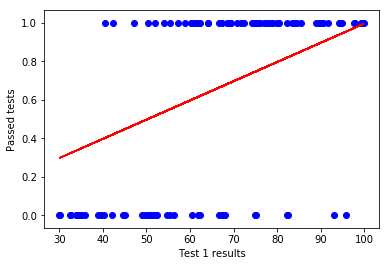

In [9]:
plt.scatter(test1,passed, c='blue')

plt.plot(test1, hypothesis(w_lin1, w_lin2, test1), c='red')

plt.xlabel('Test 1 results')
plt.ylabel('Passed tests')
plt.show()

Problem: The prediction must take only two values 0 and 1. That is, we do not want to have our prediction to have arbitrarily large or small values.

# Plotting the data

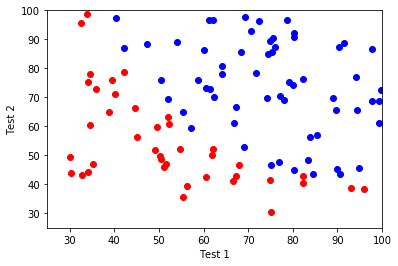

In [13]:
axes = plt.gca()

admitted = np.array(data.loc[data['Admitted'] == 1][['Test 1', 'Test 2']])
not_admitted = np.array(data.loc[data['Admitted'] == 0][['Test 1', 'Test 2']])

plt.scatter(admitted[:,0], admitted[:,1], c='blue')
plt.scatter(not_admitted[:,0], not_admitted[:,1], c='red')

axes.set_ylim([25, 100])
axes.set_xlim([25, 100])

plt.xlabel('Test 1')
plt.ylabel('Test 2')

plt.show()

# Instantiating X and y

In [15]:
X = np.array(data[['Test 1', 'Test 2']]) # set a matrix with the scores as its elements
y = np.array([data['Admitted']]).T # the vector contains for each matrix row two values: 0 for failed, 1 for passed
m = X.shape[0] # m-dim of the matrix: number of 'students'
n = X.shape[1] # n-dim of the matrix: number of written tests (2 in total)
print(X[:5])
print(y[:5])

[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
[[0]
 [0]
 [0]
 [1]
 [1]]


# Adding the ones to X

In order to vectorize the prediction function, the rows of X and the dimension of the weight vector w musst be identical. Thus, the feature vector (rows of the matrix) must be extended with ones.

In [16]:
ones = np.ones((m, 1))
X = np.hstack((X, ones))
X[:5]

array([[ 34.62365962,  78.02469282,   1.        ],
       [ 30.28671077,  43.89499752,   1.        ],
       [ 35.84740877,  72.90219803,   1.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ]])

# Initializing w

In [17]:
w = np.zeros((n + 1, 1))

# Defining the sigmoid function (or _logistic_ function)

$g(z) = \frac{1}{1 + e^{-z}}$

In [18]:
def sigmoid(z): # write the sigmoid function
    return 1/(1 + np.exp(-z))

Compose $f(x) = w^Tx$ with the sigmoid function:

$f(x) =  g(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$

In [29]:
y_pred = sigmoid(X.dot(w)) # write the composed prediction function

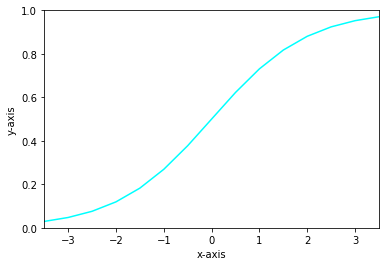

In [26]:
sig_x = np.array([-3.5 ,-3 ,-2.5 ,-2 ,-1.5 ,-1 ,-0.5 ,0 ,0.5 ,1 ,1.5 ,2 ,2.5 ,3 ,3.5])

plt.plot(sig_x,sigmoid(sig_x), c='cyan')

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xlim([-3.5,3.5])
plt.ylim([0,1])

plt.show()

# Defining the cost function

$LogCost(w) = \frac{1}{m} (-y^T\log(f(X)) - (1 - y)^T \log (1 - f(X)))$

In [27]:
def cost(y_pred, y):
    return (1/m) * (-y.T.dot(np.log(y_pred)) - (1 - y).T.dot(np.log(1 - y_pred))) #task

print("Initial cost with all of the weights set to zero: ", cost(y_pred, y))

Initial cost with all of the weights set to zero:  [[ 0.69314718]]


# Gradient descent

In [32]:
alpha = 0.001
num_iters = 2000000

def gradient_descent(X, w, y, m, alpha, num_iters):
    cost_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        y_pred = sigmoid(X.dot(w))
        w = w - alpha * (1/m) * (X.T.dot((y_pred - y)))
        cost_history[i] = cost(y_pred, y)
    return y_pred, w, cost_history

y_pred, w, cost_history = gradient_descent(X, w, y, m, alpha, num_iters)
w

array([[  0.15767916],
       [  0.15228738],
       [-19.08468795]])

# Plotting cost history

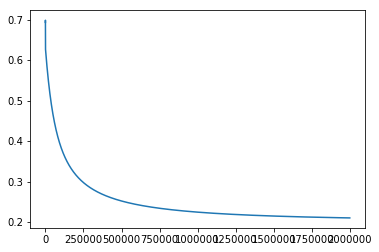

[[ 0.21041328]
 [ 0.21041327]
 [ 0.21041327]
 [ 0.21041326]
 [ 0.21041325]]


In [33]:
x = range(num_iters)

plt.plot(x, cost_history)
plt.show()
print(cost_history[-5:])

# Computing accuracy score

In [34]:
y_pred = sigmoid(X.dot(w))
y_train_pred = np.round(y_pred)

from sklearn.metrics import accuracy_score

accuracy_score(y_train_pred, y)

0.89000000000000001

The new weights computed from the gradient descent can be used to draw the decision boundary with the following formula:

$y = \frac{-w_1}{w_3} + \frac{-w_2}{w_3}x$

[  30.           30.70707071   31.41414141   32.12121212   32.82828283
   33.53535354   34.24242424   34.94949495   35.65656566   36.36363636
   37.07070707   37.77777778   38.48484848   39.19191919   39.8989899
   40.60606061   41.31313131   42.02020202   42.72727273   43.43434343
   44.14141414   44.84848485   45.55555556   46.26262626   46.96969697
   47.67676768   48.38383838   49.09090909   49.7979798    50.50505051
   51.21212121   51.91919192   52.62626263   53.33333333   54.04040404
   54.74747475   55.45454545   56.16161616   56.86868687   57.57575758
   58.28282828   58.98989899   59.6969697    60.4040404    61.11111111
   61.81818182   62.52525253   63.23232323   63.93939394   64.64646465
   65.35353535   66.06060606   66.76767677   67.47474747   68.18181818
   68.88888889   69.5959596    70.3030303    71.01010101   71.71717172
   72.42424242   73.13131313   73.83838384   74.54545455   75.25252525
   75.95959596   76.66666667   77.37373737   78.08080808   78.78787879
   79.4

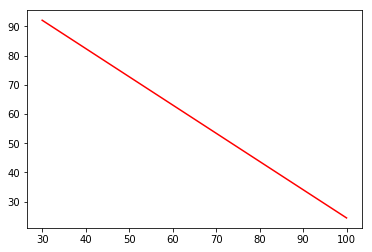

In [37]:
we_1, we_2, we_3 = w


# see the coutour approach for a more general solution
ex1 = np.linspace(30, 100, 100)
ex2 = we_3/(-we_1) + we_2/(-we_1)*ex1
#render_exams(data, admitted, rejected)

plt.plot(ex1, ex2, color='r', label='decision boundary');
plt.show();

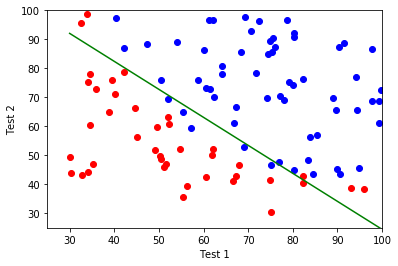

In [36]:
axes = plt.gca()

admitted = np.array(data.loc[data['Admitted'] == 1][['Test 1', 'Test 2']])
not_admitted = np.array(data.loc[data['Admitted'] == 0][['Test 1', 'Test 2']])

plt.scatter(admitted[:,0], admitted[:,1], c='blue')
plt.scatter(not_admitted[:,0], not_admitted[:,1], c='red')
plt.plot(ex1, ex2, c='green')

axes.set_ylim([25, 100])
axes.set_xlim([25, 100])

plt.xlabel('Test 1')
plt.ylabel('Test 2')

plt.show()

### Further ressources

https://user.phil.hhu.de/~petersen/SoSe17_Teamprojekt/logisticRegression.html